In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [3]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv


In [1]:
array = np.array([1, 2, 3, 4, 5])
array

NameError: ignored

In [70]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
      images = []
      labels = []
      for index, line in enumerate(training_file):
        #if index == 0:
          #row = line.split(',', 1)
          #label = row[0]
          #print(label)
        if index > 0:
          row = line.split(',', 1)
          label = row[0]
          image = row[1].split(',')
          #if index <= 2:
            #print(label)
          image = np.array_split(image, 28)
          images.append(image)
          labels.append(label)
      # Your code ends here

      images = np.array(images)
      labels = np.array(labels)
      images = images.astype(np.float64)
      labels = labels.astype(np.float64)
    print (max(labels))
    return images, labels

training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

24.0
24.0
(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [71]:
#for labels in testing_labels:
#print(training_labels[0])
training_images = np.expand_dims(training_images, axis=-1)
#print(training_images)
testing_images = np.expand_dims(testing_images, axis=-1)

In [79]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255.0, rotation_range=0.2, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, fill_mode='nearest', vertical_flip=True, horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

batch_size=32

training_datagen = train_datagen.flow(training_images, y=training_labels, batch_size=batch_size)
valid_datagen = validation_datagen.flow(testing_images, y=testing_labels, batch_size=batch_size)
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [81]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D

model = tf.keras.models.Sequential([
    # Your Code Here
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(28, 28, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])
model.summary()

# Compile Model. 
#model.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Train the Model
#history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32), steps_per_epoch=len(training_images)/32, epochs=2, validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32), validation_steps=len(testing_images)/32)

history = model.fit_generator(training_datagen, steps_per_epoch = len(training_images)/batch_size, epochs = 20, validation_data = valid_datagen,  validation_steps = len(testing_images)/batch_size, verbose = 1)

#history = model.fit(train_datagen, epochs=25, steps_per_epoch=20, validation_data = validation_datagen, verbose = 1, validation_steps=3)

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 3200)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)             

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


857/857 [==============================] - 75s 86ms/step - loss: 2.7981 - accuracy: 0.1497 - val_loss: 1.9824 - val_accuracy: 0.3965
Epoch 2/20
857/857 [==============================] - 74s 87ms/step - loss: 2.1107 - accuracy: 0.3302 - val_loss: 1.4875 - val_accuracy: 0.5134
Epoch 3/20
857/857 [==============================] - 74s 87ms/step - loss: 1.6848 - accuracy: 0.4559 - val_loss: 1.4432 - val_accuracy: 0.5082
Epoch 4/20
857/857 [==============================] - 74s 86ms/step - loss: 1.3852 - accuracy: 0.5501 - val_loss: 0.9019 - val_accuracy: 0.6665
Epoch 5/20
857/857 [==============================] - 74s 86ms/step - loss: 1.1694 - accuracy: 0.6197 - val_loss: 0.6336 - val_accuracy: 0.7578
Epoch 6/20
857/857 [==============================] - 74s 86ms/step - loss: 1.0153 - accuracy: 0.6696 - val_loss: 0.5079 - val_accuracy: 0.8132
Epoch 7/20
857/857 [==============================] - 74s 86ms/step - loss: 0.9012 - accuracy: 0.7048 - val_loss: 0.3750 - val_accuracy: 0.8724
Epo

[6.92426086682151, 0.56609035]

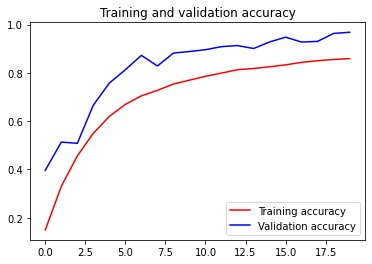

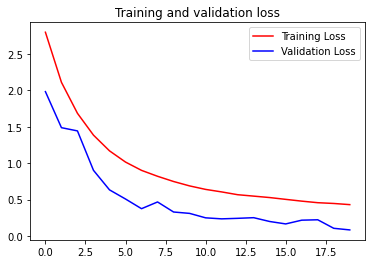

In [86]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()